In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('C:/Users/amant/Downloads/Glass Identification.csv')
df.head()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
df.isnull().sum()

id                0
RI                0
Na                0
Mg                0
Al                0
Si                0
K                 0
Ca                0
Ba                0
Fe                0
Types of glass    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              214 non-null    int64  
 1   RI              214 non-null    float64
 2   Na              214 non-null    float64
 3   Mg              214 non-null    float64
 4   Al              214 non-null    float64
 5   Si              214 non-null    float64
 6   K               214 non-null    float64
 7   Ca              214 non-null    float64
 8   Ba              214 non-null    float64
 9   Fe              214 non-null    float64
 10  Types of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [17]:
df.shape

(214, 11)

In [18]:
df.describe()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


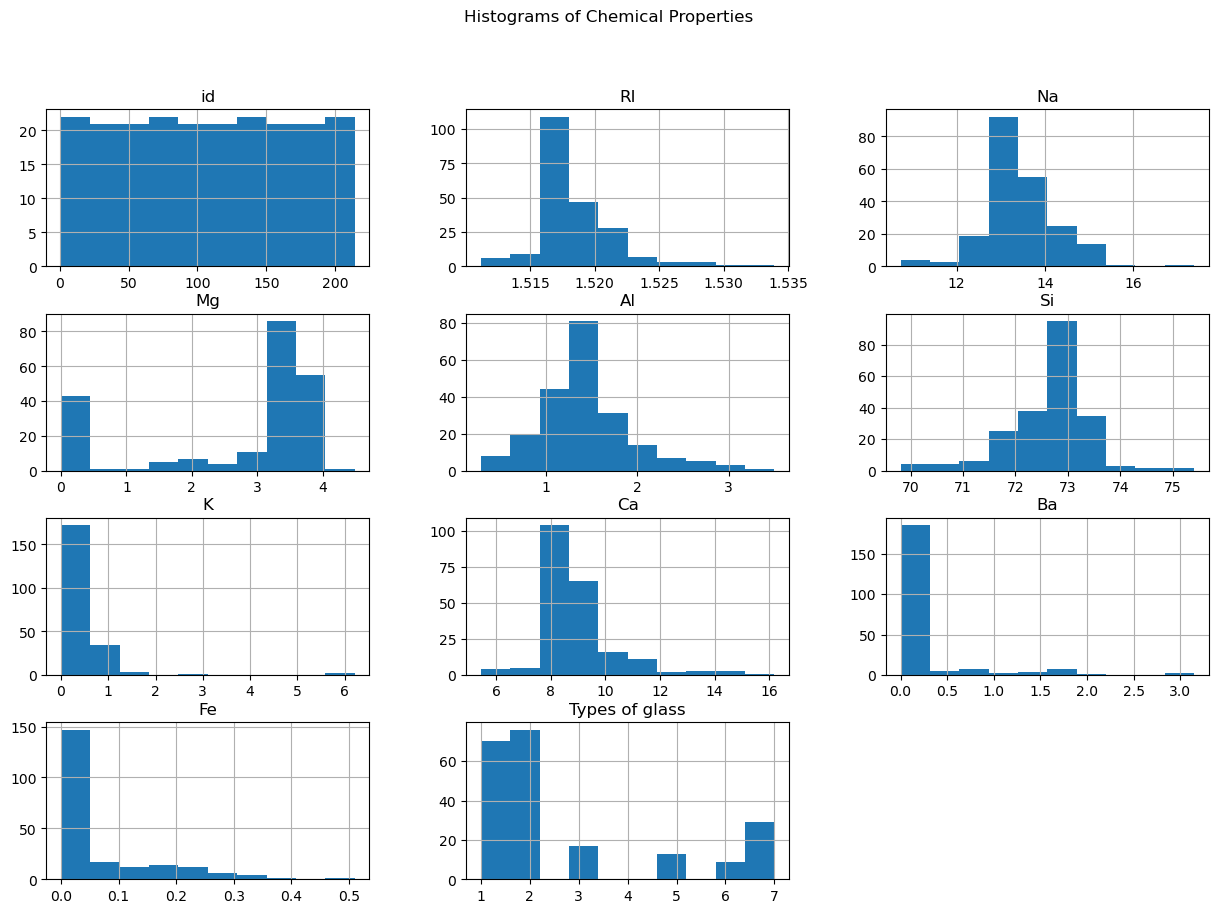

In [43]:
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Chemical Properties')#plt.suptitle()-Used when you have a figure with multiple subplots and you want to add a main title that covers the entire figure.
plt.show()

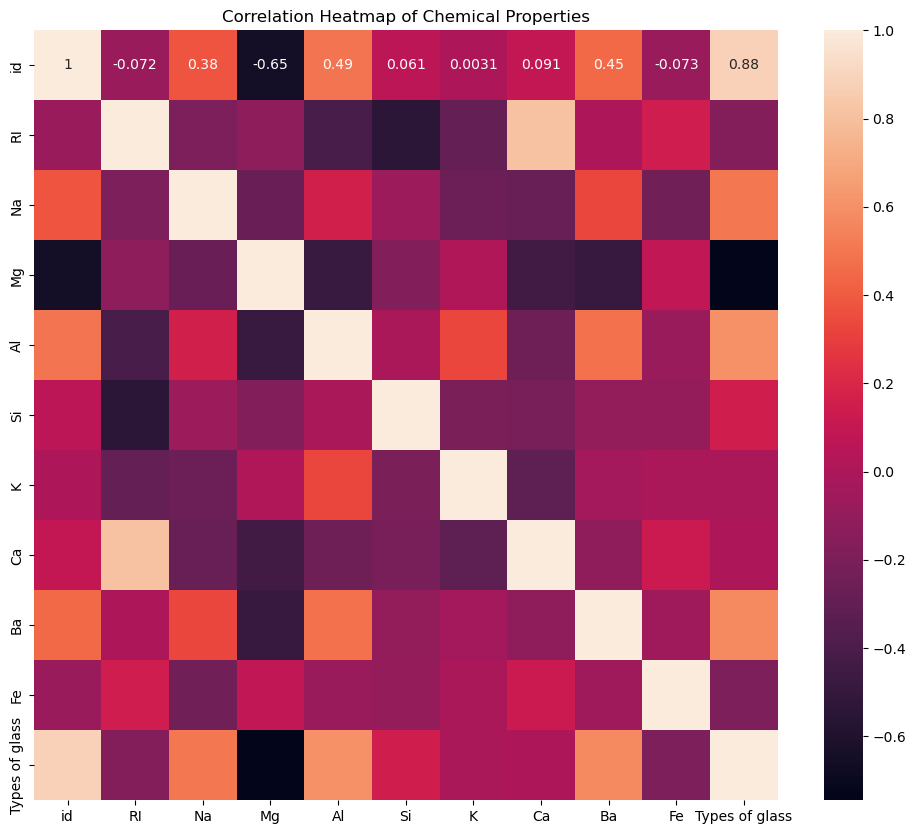

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap of Chemical Properties')
plt.show()

In [47]:
X = df.drop(columns=['id', 'Types of glass'])
y = df['Types of glass']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)

In [74]:
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [78]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [79]:
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print(f'Random Forest Accuracy: {accuracy_rf}')

Logistic Regression Accuracy: 0.6976744186046512
Random Forest Accuracy: 0.8372093023255814


In [81]:
print('Classification Report for Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       0.60      0.86      0.71        14
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         3
           7       0.78      0.88      0.82         8

    accuracy                           0.70        43
   macro avg       0.52      0.51      0.50        43
weighted avg       0.62      0.70      0.65        43

